### 静态网格 -- 不平仓

策略逻辑：
- 假设初始资金量为w0，网格数量为n_grid，网格距离为d_grid，maker交易手续费为tx
- 初始每个网格, limit单的资金量为 w0/n_grid
- 根据当前1分钟的close价格（c_t0），设置网格【上下摆limit单】
- 下1分钟的close(c_t1)和c_t0之间的limit单，视为成交
- 记录当前仓位w_t1，每一次价格变化，网格重新发生变化。
- 不平仓


In [2]:
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from IPython.utils import io
from functions_processing_data import get_data
# from bt_grid import * 
from bt_grid_fast import * 
# from bt_grid_noprint import * 

In [2]:
file_name = "binance_futures_BTCUSDT_20200101_20220322.csv"
# file_name = "binance_futures_BTCUSDT_20220329_tick.csv"
df_data = get_data(file_name)
# df_data = df_data.loc[df_data.index > pd.to_datetime("2021/6/1"), :].iloc[:100]

In [3]:
df_data = df_data.loc[df_data.index > pd.to_datetime("2021/6/1"), :]
df_data

,open,high,low,close,volume
Time,,,,,
2021-06-01 00:01:00,37107.13,37237.60,37107.00,37172.49,976.822
2021-06-01 00:02:00,37172.49,37451.19,37172.49,37446.32,1175.449
2021-06-01 00:03:00,37446.49,37650.00,37420.70,37597.04,2620.040
2021-06-01 00:04:00,37596.95,37609.74,37507.02,37609.05,1012.639
2021-06-01 00:05:00,37609.05,37660.00,37541.14,37619.52,1177.270
...,...,...,...,...,...
2022-03-21 23:56:00,41044.00,41045.00,41037.40,41045.00,17.962
2022-03-21 23:57:00,41045.00,41051.20,41037.50,41037.60,37.729
2022-03-21 23:58:00,41037.60,41037.60,41032.30,41033.70,13.073


In [4]:
# df_data.close.to_csv("DOTUSDT.csv")

In [19]:
file_name = "binance_futures_BTCUSDT_20220329_tick.csv"
file_name = "binance_futures_BTCUSDT_20220405_tick.csv"
# file_name = "binance_futures_XRPUSDT_20220405_tick.csv"
data_path = os.path.join(os.getcwd(), "data")
df_data = pd.read_csv(
            os.path.join(data_path, file_name), header=[0], index_col=[0]
        )
# df_data
df_data.price.iloc[400000:].to_csv("binance_futures_BTCUSDT_20220405_tick.csv")

C:\Users\wangj\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [20]:
df_data.shape

(1012596, 3)

In [3]:
file_name = "binance_futures_BTCUSDT_20220329_tick.csv"
file_name = "binance_futures_BTCUSDT_20220405_tick.csv"
# file_name = "binance_futures_XRPUSDT_20220405_tick.csv"
data_path = os.path.join(os.getcwd(), "data")
df_data = pd.read_csv(
            os.path.join(data_path, file_name), header=[0], index_col=[0]
        )
df_data.index = pd.to_datetime(df_data.index, unit="s")
df_data.rename(
            columns={
                "Time": "time",
                "Open": "open",
                "High": "high",
                "Close": "close",
                "Low": "low",
                "Volume": "volume",
                "price": "close",
            },
            inplace=True,
        )
df_data

C:\Users\wangj\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,close,size,is_buyer_maker
time_seconds,,,
2022-04-05 00:00:00.068999936,46581.0,0.055,0
2022-04-05 00:00:00.109999872,46580.9,0.040,1
2022-04-05 00:00:00.109999872,46581.0,0.086,0
2022-04-05 00:00:00.122999808,46580.9,0.040,1
2022-04-05 00:00:00.147000064,46581.0,0.004,0
...,...,...,...
2022-04-05 23:59:59.588999936,45476.6,0.002,0
2022-04-05 23:59:59.588999936,45476.7,0.259,0
2022-04-05 23:59:59.611000064,45477.3,0.001,0


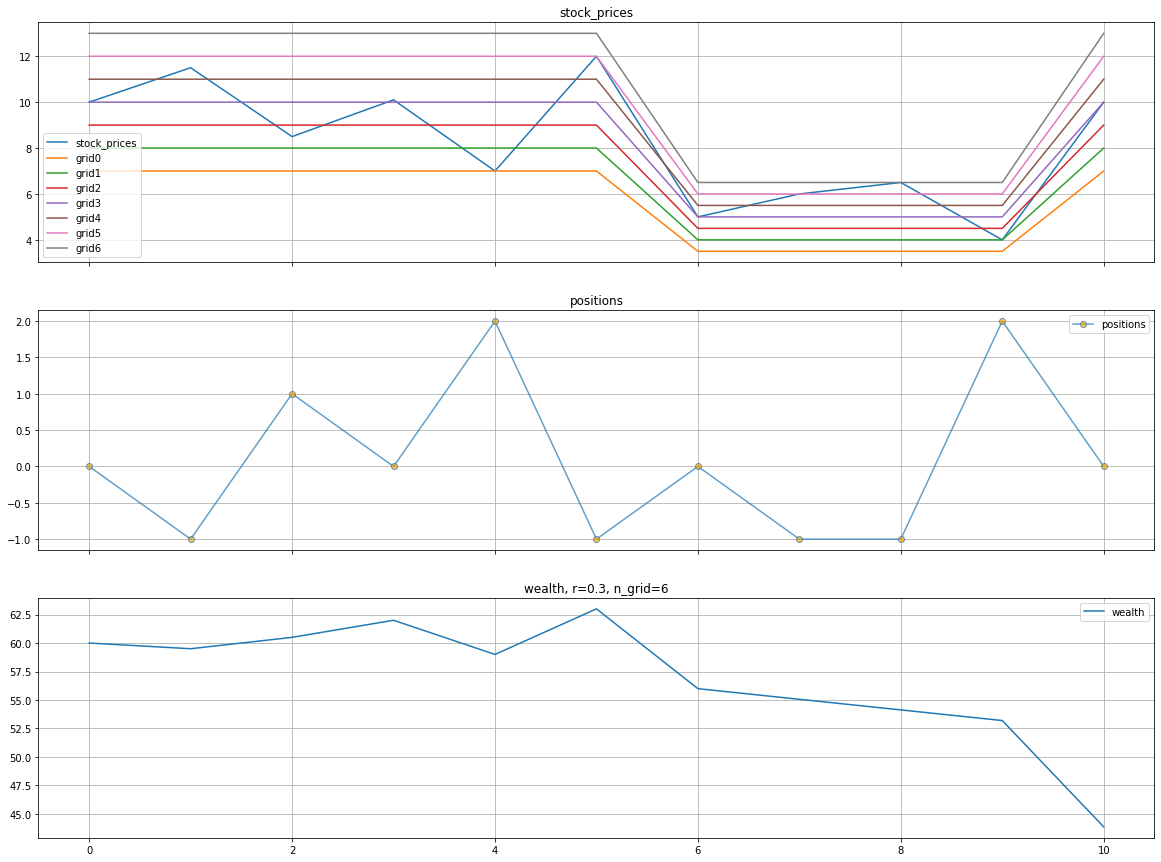

In [3]:
# 策略参数
w0 = 60
r = 0.3
n_grid = 6
tp = "arth"
data = pd.Series(np.array([10, 11.5, 8.5, 10.1, 7, 12, 5, 6, 6.5, 4, 10]))
# data = pd.Series(np.array([10, 11.5, 8.5, 7, 12, 5, 6]))
# data = pd.Series(np.array([10, 9.5, 10.5, 10.5, 9.5]))

# test 
static_grid_bt = StaticGridBT(w0, r, n_grid, tp, data, is_trading_even=False, tx_m=0, tx_t=0.0002)
# static_grid_bt.run_on_bar()

with io.capture_output() as captured: # this will supress (e.g. capture) stdout and stderr
    static_grid_bt.run_on_bar()
static_grid_bt.plot_results()

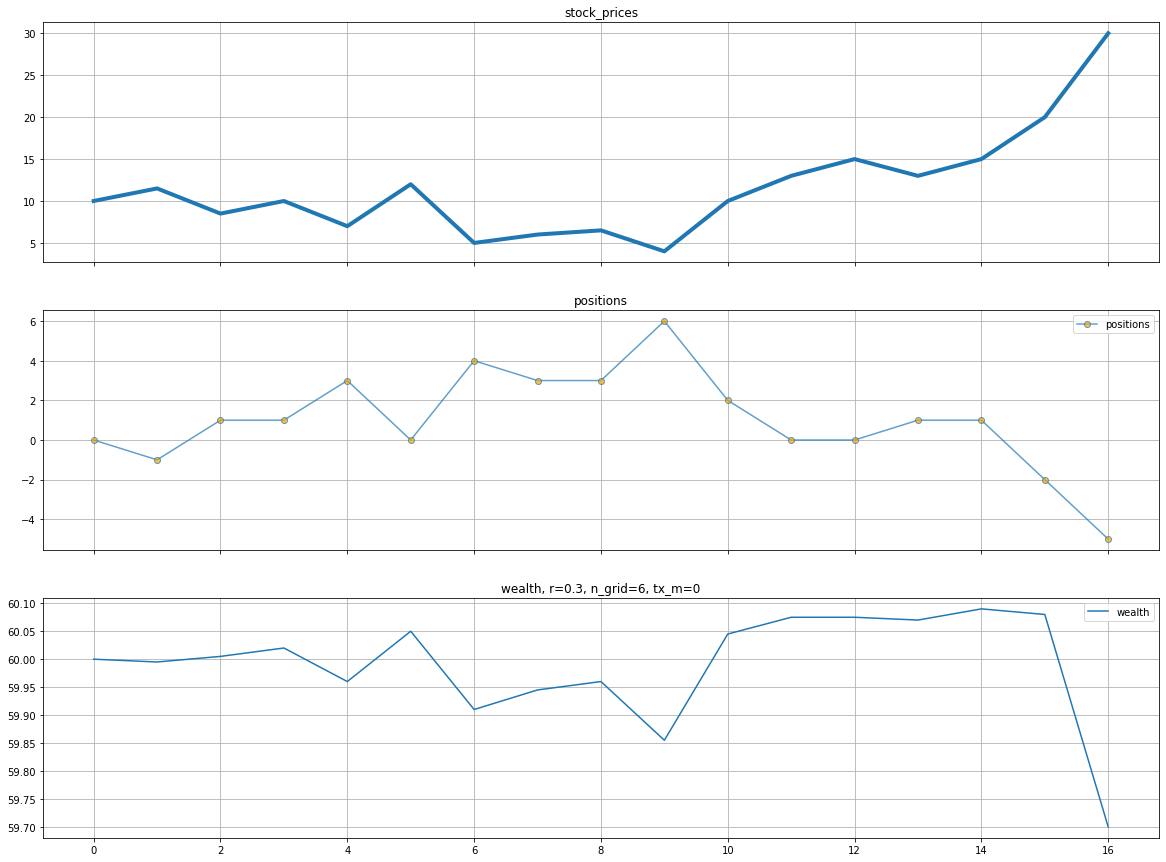

In [22]:
# 策略参数
w0 = 60
r = 0.3
n_grid = 6
tp = "arth"
data = pd.Series(np.array([10, 11.5, 8.5, 10, 7, 12, 5, 6, 6.5, 4, 10, 13, 15, 13, 15, 20, 30]))
# data = pd.Series(np.array([10, 11.5, 8.5, 7, 12, 5, 6]))
# data = pd.Series(np.array([10, 9.5, 10.5, 10.5, 9.5]))

# test 
static_grid_bt = StaticGridBT(w0, r, n_grid, tp, data, is_trading_even=False, tx_m=0, tx_t=0.0002)
# static_grid_bt.run_on_bar()

with io.capture_output() as captured: # this will supress (e.g. capture) stdout and stderr
    static_grid_bt.run_on_bar()
static_grid_bt.plot_results()

In [33]:
df_data.close

time_seconds
2022-04-05 00:00:00.068999936    46581.0
2022-04-05 00:00:00.109999872    46580.9
2022-04-05 00:00:00.109999872    46581.0
2022-04-05 00:00:00.122999808    46580.9
2022-04-05 00:00:00.147000064    46581.0
                                  ...   
2022-04-05 23:59:59.588999936    45476.6
2022-04-05 23:59:59.588999936    45476.7
2022-04-05 23:59:59.611000064    45477.3
2022-04-05 23:59:59.826999808    45477.4
2022-04-05 23:59:59.936000000    45477.4
Name: close, Length: 1012596, dtype: float64

[46441.3 46446.8 46452.4 46458.  46463.6 46469.2 46474.8 46480.4 46486.
 46491.6 46497.2 46502.7 46508.3 46513.9 46519.5 46525.1 46530.7 46536.3
 46541.9 46547.5 46553.1 46558.6 46564.2 46569.8 46575.4 46581.  46586.6
 46592.2 46597.8 46603.4 46608.9 46614.5 46620.1 46625.7 46631.3 46636.9
 46642.5 46648.1 46653.7 46659.3 46664.8 46670.4 46676.  46681.6 46687.2
 46692.8 46698.4 46704.  46709.6 46715.2 46720.7]
[5.5 5.6 5.6 5.6 5.6 5.6 5.6 5.6 5.6 5.6 5.5 5.6 5.6 5.6 5.6 5.6 5.6 5.6
 5.6 5.6 5.5 5.6 5.6 5.6 5.6 5.6 5.6 5.6 5.6 5.5 5.6 5.6 5.6 5.6 5.6 5.6
 5.6 5.6 5.6 5.5 5.6 5.6 5.6 5.6 5.6 5.6 5.6 5.6 5.6 5.5]


0.6993030499999737

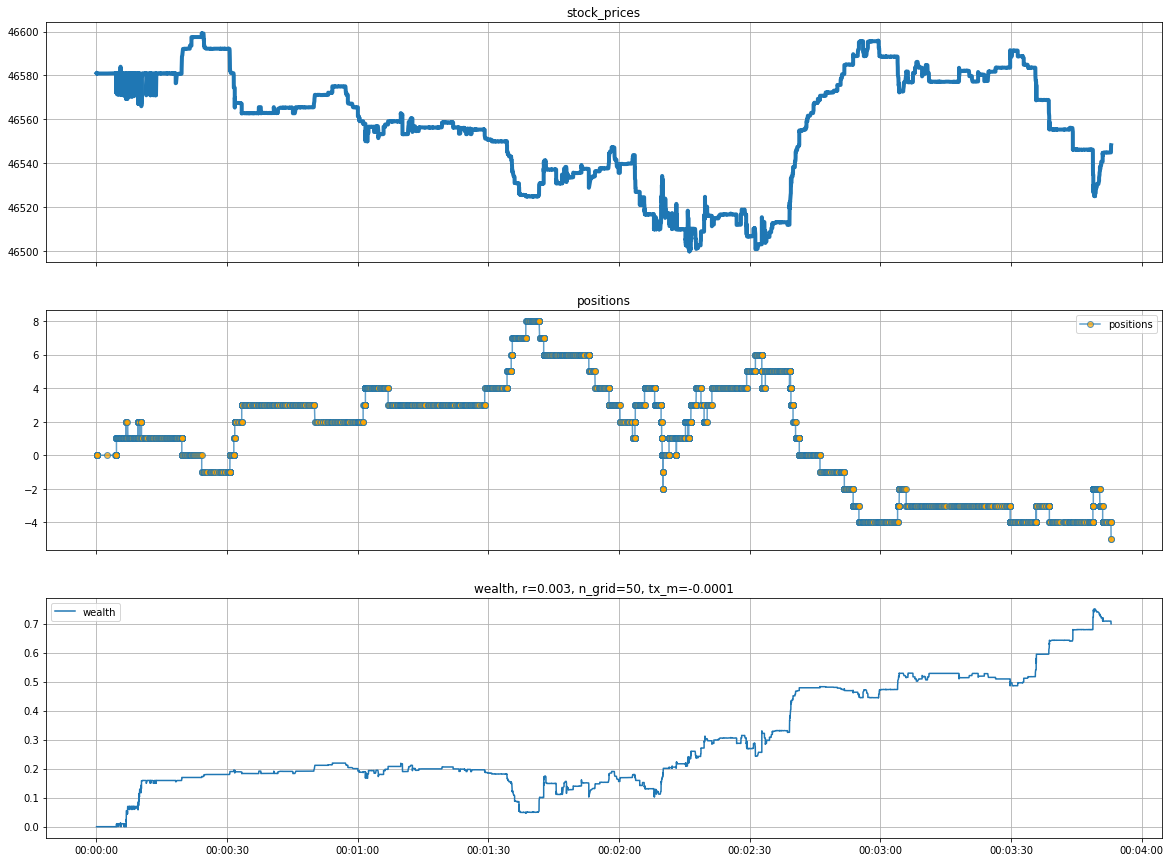

In [42]:
# 策略参数
w0 = 0
r = 0.003
n_grid = 50
tp = "arth"
# price_precision = 4
price_precision = 1

# test 
static_grid_bt = StaticGridBT(
    w0,
    r,
    n_grid,
    tp,
    df_data.close.iloc[0:4500],
    is_trading_even=False,
    tx_m=-0.0001,
    tx_t=-0.0001,
    grid_quantity=0.001,
    price_precision=price_precision
)

print(static_grid_bt.current_grid)
print(
    np.round(
        [
            static_grid_bt.current_grid[i + 1] - static_grid_bt.current_grid[i]
            for i in range(len(static_grid_bt.current_grid) - 1)
        ],
        price_precision,
    )
)

# static_grid_bt.run_on_bar()

with io.capture_output() as captured: # this will supress (e.g. capture) stdout and stderr
    static_grid_bt.run_on_bar()
static_grid_bt.plot_results()
static_grid_bt.wealth.iloc[-1]

# [46441.7 46447.3 46452.8 46458.4 46464.  46469.6 46475.2 46480.7 46486.3
#  46491.9 46497.5 46503.1 46508.7 46514.2 46519.8 46525.4 46531.  46536.6
#  46542.1 46547.7 46553.3 46558.9 46564.5 46570.  46575.6 46581.2 46586.8
#  46592.4 46598.  46603.5 46609.1 46614.7 46620.3 46625.9 46631.4 46637.
#  46642.6 46648.2 46653.8 46659.3 46664.9 46670.5 46676.1 46681.7 46687.3
#  46692.8 46698.4 46704.  46709.6 46715.2 46720.7]


In [44]:
sum(df_data.close.iloc[0:4500] > 46720.7)

0

[46441.3 46446.8 46452.4 46458.  46463.6 46469.2 46474.8 46480.4 46486.
 46491.6 46497.2 46502.7 46508.3 46513.9 46519.5 46525.1 46530.7 46536.3
 46541.9 46547.5 46553.1 46558.6 46564.2 46569.8 46575.4 46581.  46586.6
 46592.2 46597.8 46603.4 46608.9 46614.5 46620.1 46625.7 46631.3 46636.9
 46642.5 46648.1 46653.7 46659.3 46664.8 46670.4 46676.  46681.6 46687.2
 46692.8 46698.4 46704.  46709.6 46715.2 46720.7]
[5.5 5.6 5.6 5.6 5.6 5.6 5.6 5.6 5.6 5.6 5.5 5.6 5.6 5.6 5.6 5.6 5.6 5.6
 5.6 5.6 5.5 5.6 5.6 5.6 5.6 5.6 5.6 5.6 5.6 5.5 5.6 5.6 5.6 5.6 5.6 5.6
 5.6 5.6 5.6 5.5 5.6 5.6 5.6 5.6 5.6 5.6 5.6 5.6 5.6 5.5]


307.2954274300014

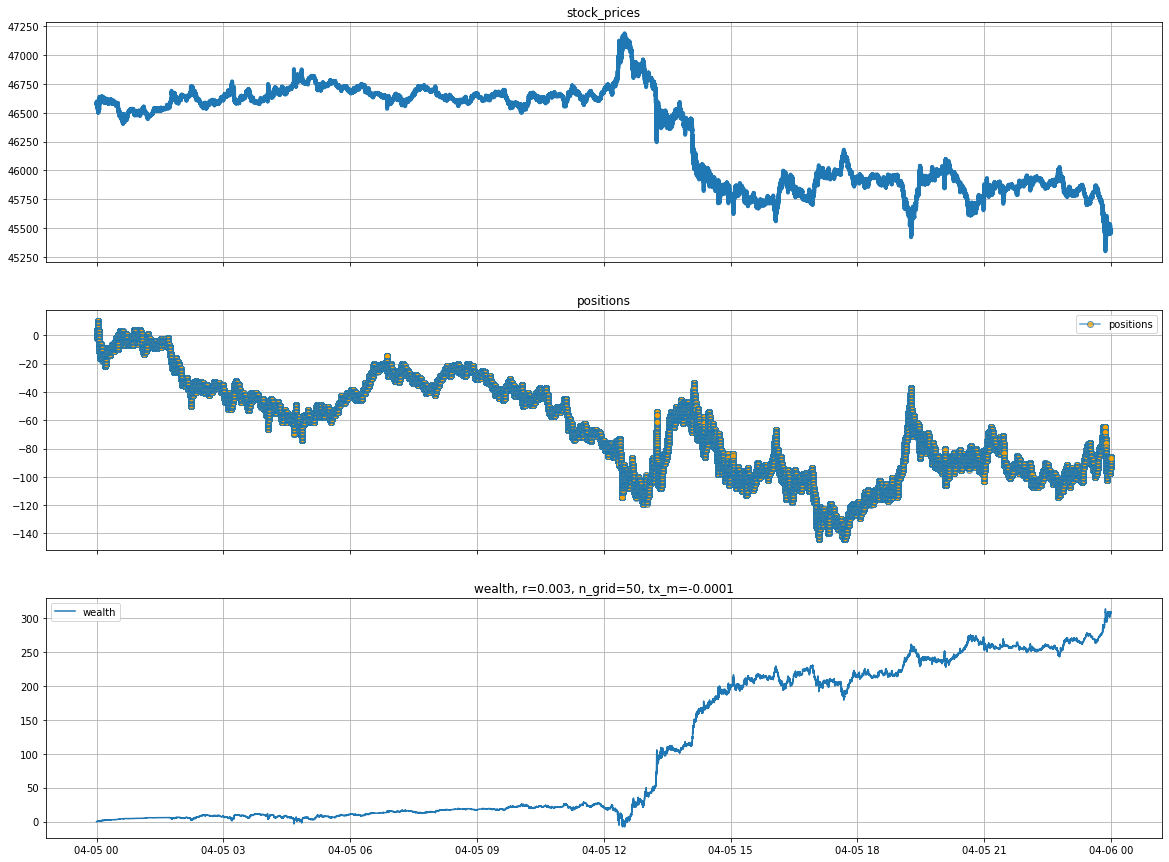

In [11]:
# 策略参数
w0 = 0
r = 0.003
n_grid = 50
tp = "arth"
# price_precision = 4
price_precision = 1

# test 
static_grid_bt = StaticGridBT(
    w0,
    r,
    n_grid,
    tp,
    df_data.close,
    is_trading_even=False,
    tx_m=-0.0001,
    tx_t=-0.0001,
    grid_quantity=0.001,
    price_precision=price_precision
)

print(static_grid_bt.current_grid)
print(
    np.round(
        [
            static_grid_bt.current_grid[i + 1] - static_grid_bt.current_grid[i]
            for i in range(len(static_grid_bt.current_grid) - 1)
        ],
        price_precision,
    )
)

# static_grid_bt.run_on_bar()

with io.capture_output() as captured: # this will supress (e.g. capture) stdout and stderr
    static_grid_bt.run_on_bar()
static_grid_bt.plot_results()
static_grid_bt.wealth.iloc[-1]




[46441.7 46447.3 46452.8 46458.4 46464.  46469.6 46475.2 46480.7 46486.3
 46491.9 46497.5 46503.1 46508.7 46514.2 46519.8 46525.4 46531.  46536.6
 46542.1 46547.7 46553.3 46558.9 46564.5 46570.  46575.6 46581.2 46586.8
 46592.4 46598.  46603.5 46609.1 46614.7 46620.3 46625.9 46631.4 46637.
 46642.6 46648.2 46653.8 46659.3 46664.9 46670.5 46676.1 46681.7 46687.3
 46692.8 46698.4 46704.  46709.6 46715.2 46720.7]
[5.6 5.5 5.6 5.6 5.6 5.6 5.5 5.6 5.6 5.6 5.6 5.6 5.5 5.6 5.6 5.6 5.6 5.5
 5.6 5.6 5.6 5.6 5.5 5.6 5.6 5.6 5.6 5.6 5.5 5.6 5.6 5.6 5.6 5.5 5.6 5.6
 5.6 5.6 5.5 5.6 5.6 5.6 5.6 5.6 5.5 5.6 5.6 5.6 5.6 5.5]


348.13445511999686

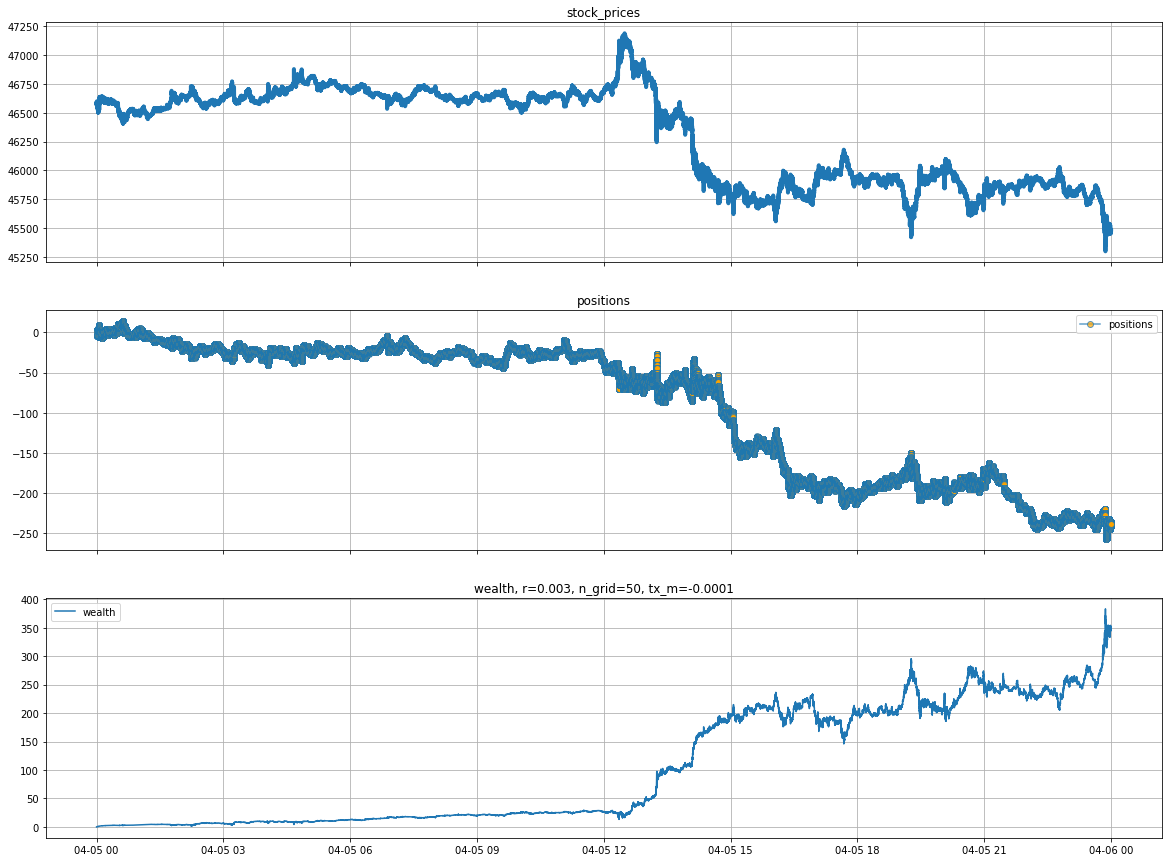

In [12]:
# 策略参数
w0 = 0
r = 0.003
n_grid = 50
tp = "geom"
# price_precision = 1

# test 
static_grid_bt = StaticGridBT(
    w0,
    r,
    n_grid,
    tp,
    df_data.close,
    is_trading_even=False,
    tx_m=-0.0001,
    tx_t=-0.0001,
    grid_quantity=0.001,
    price_precision=price_precision
)

print(static_grid_bt.current_grid)
print(
    np.round(
        [
            static_grid_bt.current_grid[i + 1] - static_grid_bt.current_grid[i]
            for i in range(len(static_grid_bt.current_grid) - 1)
        ],
        price_precision,
    )
)

with io.capture_output() as captured: # this will supress (e.g. capture) stdout and stderr
    static_grid_bt.run_on_bar()
static_grid_bt.plot_results()
static_grid_bt.wealth.iloc[-1]